In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

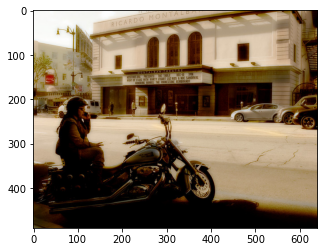

In [2]:
image=cv2.imread('./Images/test_1.jpg')
plt.imshow(image[:,:,::-1])

In [3]:
model=cv2.dnn.readNetFromDarknet('./yolov3.cfg','./yolov3.weights')
model

< cv2.dnn.Net 0000018516B118F0>

In [4]:
classes = []
k = open('./class_names','r')
for i in k.readlines():
    classes.append(i.strip())
classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [5]:
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320),True,crop = False)
blob

array([[[[ 0.9568628 ,  0.9607844 ,  0.9607844 , ..., -0.00392157,
           0.        , -0.00392157],
         [ 0.9568628 ,  0.9568628 ,  0.9607844 , ..., -0.00392157,
          -0.00392157, -0.00392157],
         [ 0.9607844 ,  0.9607844 ,  0.9607844 , ..., -0.00392157,
           0.        ,  0.        ],
         ...,
         [ 0.17254902,  0.15686275,  0.11764707, ..., -0.00392157,
          -0.00392157, -0.00392157],
         [ 0.18039216,  0.16862746,  0.17254902, ..., -0.00392157,
          -0.00392157, -0.00392157],
         [ 0.20784315,  0.16470589,  0.16862746, ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.9686275 ,  0.9725491 ,  0.9725491 , ...,  0.00784314,
           0.01176471,  0.00392157],
         [ 0.9686275 ,  0.9686275 ,  0.9725491 , ...,  0.00392157,
           0.00784314,  0.        ],
         [ 0.9725491 ,  0.9725491 ,  0.9725491 , ...,  0.00392157,
           0.00784314,  0.00392157],
         ...,
         [ 0.31764707,  0.30588236

In [6]:
blob.shape

(1, 3, 320, 320)

In [7]:
model.setInput(blob)

In [8]:
layers=model.getLayerNames()
layers

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [9]:
layer1=model.getUnconnectedOutLayers()
layer1

array([200, 227, 254])

In [10]:
layer2=model.getUnconnectedOutLayersNames()
layer2

('yolo_82', 'yolo_94', 'yolo_106')

In [11]:
output=[layers[i-1] for i in layer1]
output

['yolo_82', 'yolo_94', 'yolo_106']

In [12]:
out_layer_report=model.forward(output)
out_layer_report

(array([[0.04398706, 0.05325694, 0.612988  , ..., 0.        , 0.        ,
         0.        ],
        [0.06234087, 0.05081297, 0.41146103, ..., 0.        , 0.        ,
         0.        ],
        [0.06464593, 0.04998876, 0.97118217, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.94189614, 0.93409646, 0.6162795 , ..., 0.        , 0.        ,
         0.        ],
        [0.9556553 , 0.94780934, 0.42526078, ..., 0.        , 0.        ,
         0.        ],
        [0.958552  , 0.95002204, 1.08275   , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02378085, 0.03034624, 0.05734108, ..., 0.        , 0.        ,
         0.        ],
        [0.01777826, 0.02213109, 0.53267586, ..., 0.        , 0.        ,
         0.        ],
        [0.02966664, 0.01986965, 0.08831258, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96682864, 0.9708273 , 0.05736489, ..., 0.        , 0.        ,
         0.        

In [13]:
Threshold = 0.5
image_size = 320

def predictions(final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    
    for i in final_box.flatten():
        if classes_names[ids[i]] == 'person':
            x , y , w , h = cordinates[i]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            font = cv2.FONT_HERSHEY_PLAIN
            cnf = str(round(confidence_score[i] , 2))
            text = str(classes[ids[i]])+'--'+cnf
            
            cv2.rectangle(image , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
            cv2.putText(image,text , (x ,y-2) , font,1,(255,255,255),2,cv2.LINE_AA)
        else:
            pass


def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids

image = cv2.imread('./Images/test_1.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_width , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3.cfg','./yolov3.weights')
classes_names = []
k = open('./class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)

                
        
    
final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
predictions(final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
    

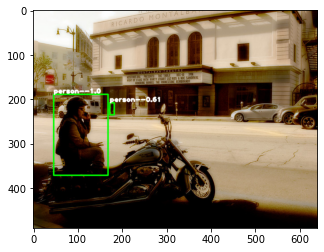

In [14]:
plt.imshow(image[:,:,::-1])

In [15]:
Threshold = 0.5
image_size = 320

def predictions(final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    
    for i in final_box.flatten():
        if classes_names[ids[i]] == 'person':
            x , y , w , h = cordinates[i]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            font = cv2.FONT_HERSHEY_PLAIN
            cnf = str(round(confidence_score[i] , 2))
            text = str(classes[ids[i]])+'--'+cnf
            
            cv2.rectangle(image , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
            cv2.putText(image,text , (x ,y-2) , font,1,(255,255,255),2,cv2.LINE_AA)
        else:
            pass


def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


image = cv2.imread('./Images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_width , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3.cfg','./yolov3.weights')
classes_names = []
k = open('./class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)

                
        
    
final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
predictions(final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
    

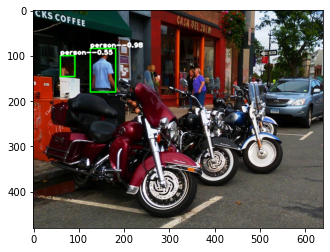

In [16]:
plt.imshow(image[:,:,::-1])

## PEDESTRAIN DETECTION IN VIDEO

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2


Threshold = 0.5
image_size = 320

total_persons_detected = []
total_cars_detected = []


def predictions(frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


cap = cv2.VideoCapture('./yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3.cfg','./yolov3.weights')
        classes_names = []
        k = open('./class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frame' , frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

persons =  6
persons =  3


In [18]:


Threshold = 0.5
image_size = 320


def predictions(img , frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    total_persons_detected = []
    total_cars_detected = []
    
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(img , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(img , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids

cap = cv2.VideoCapture('./yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        img = np.zeros([512,512,3] , dtype = 'uint8')
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3.cfg','./yolov3.weights')
        classes_names = []
        k = open('./class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(img , frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frames',frame)
        cv2.imshow('report' , img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

persons =  6
persons =  3
persons =  4
persons =  4


## Information after NMS

In [19]:
final_box

array([ 0,  7,  8, 14,  3,  2])

In [20]:
cordinates

[[137, 44, 73, 268],
 [135, 61, 79, 265],
 [3, 71, 13, 90],
 [32, 75, 19, 93],
 [61, 56, 42, 140],
 [272, -4, 44, 257],
 [58, 55, 40, 156],
 [64, 61, 37, 146],
 [271, 0, 45, 266],
 [64, 74, 40, 142],
 [272, -26, 45, 348],
 [137, 47, 72, 249],
 [138, 45, 71, 273],
 [142, 35, 70, 295],
 [189, 202, 21, 98],
 [190, 210, 20, 97]]

In [21]:
confidence_score

[0.9994692,
 0.84219235,
 0.6593848,
 0.7257265,
 0.9656943,
 0.99160874,
 0.9793699,
 0.99877316,
 0.99542725,
 0.61912435,
 0.8801748,
 0.83894324,
 0.9753001,
 0.8587611,
 0.8213405,
 0.59532803]

In [22]:
ids

[0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 0, 0, 0, 26, 26]

## Saving each frame

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.3
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    if len(prediction_box) > 0:
        for k in prediction_box.flatten():
            x , y , w , h = bounding_box[k]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            conf_level = str(round(confidence[k] , 2))
            label = str(classes_names[class_labels[k]])
            cv2.rectangle(frame , (x,y),(x+w , y+h),(255,0,0),1)
            cv2.putText(frame ,label+' '+conf_level,(x,y-2),font,0.5,(0,0,255),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .3)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels




count = 0
image = cv2.VideoCapture('./yolo_test.mp4')
while image.read():
    res , frame = image.read()
    if res == True:
        original_with , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3.cfg','./yolov3.weights')
        classes_names = []
        k = open('./class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
        #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
        #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
        #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
        #print(outputs)
        output_data = Neural_Network.forward(outputs)
        prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

        final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )
        cv2.imwrite('./frames/%d.jpg'%count,frame)
        cv2.imshow('YOLO Algorithm', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        count+=1
    else:
        break 

image.release()
cv2.destroyAllWindows()


In [35]:
c = []
for i in os.listdir('./frames/'):
    c.append(i)

In [36]:
c

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '17

In [37]:
# sorting all frames 
import re
c.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [38]:
img_array = []
for frame in c:
    img = cv2.imread('./frames/'+str(frame))
    height , width , layers = img.shape
    size = (width , height)
    img_array.append(img)
out = cv2.VideoWriter('./results/output.mp4',cv2.VideoWriter_fourcc(*'XVID'),5,size)
for l in range(len(img_array)):
    out.write(img_array[l])
out.release()